In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

# 100 задач с pandas
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'>

<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#env'>Импорт библиотеки. Настройки</a></li>
<li><a href='#creation'>Создание объектов pandas</a></li>
<li><a href='#functions'>Встроенные функции</a></li>
<li><a href='#access'>Просмотр данных</a></li>
<li><a href='#edit'>Редактирование данных</a></li>
<li><a href='#add'>Добавление данных</a></li>
<li><a href='#delete'>Удаление данных</a></li>
<li><a href='#ops'>Операции с данными</a></li>
<li><a href='#structure_ops'>Операции со структурами pandas</a></li>
<li><a href='#time'>Работа со временем</a></li>
<li><a href='#graphics'>Графика</a></li>
<li><a href='#io'>Ввод и вывод данных</a></li>
<li><a href='#links'>Полезные cсылки</a></li>
<li><a href='#tasks'>Задания для самостоятельной работы</a></li>
</ol>

# Введение <a name='intro'></a>

Документ содержит практические примеры использования библиотеки pandas для анализа данных.

Материал состоит из 100 типовых задач, которые можно выполнить с помощью функций pandas.

Для удобства задачи разбиты на группы, к которым можно быстро перейти в <a href='#toc'>Оглавлении</a>.

Python библиотека pandas (https://pandas.pydata.org) предназначена для анализа данных, содержит большое количество функций, делающих работу с данными быстрой и удобной. Обычно при исследовании исходные данные берутся из внешних источников - файлов (txt, csv, tsv, excel-файлы), баз данных, через открытые интерфейсы (API, socket). Pandas содержит удобрые средства для загрузки таких данных и последующего анализа, преобразования, визуализации (совместно с библиотеками matplotlib и seaborn) и сохранения результатов в файле заданного формата (csv, xls).

Основные конструкции pandas: pandas.Series (одномерный массив) и pandas.DataFrame (двумерный массив). Pandas удобно применять для задач машинного обучения: столбцы pandas.DataFrame легко интерпретировать как значения конкретного признака для различных наблюдений, а строки - как результаты (набор значений признаков) отдельного измерения (наблюдения).

<a href='#toc'>Назад к Оглавлению</a>


# Импорт библиотеки. Настройки. 
<a id='env'></a>

#### Импортировать библиотеку pandas. Посмотреть версию.

In [2]:
import pandas as pd
print(pd.__version__)

0.25.1


#### С помощью pandas посмотреть версии установленных библиотек.

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 32
OS               : Windows
OS-release       : 7
machine          : x86
processor        : x86 Family 6 Model 37 Stepping 5, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : 5.8.3
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext)
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4

#### Изменить параметры вывода данных на экран

In [124]:
a = np.random.random(size=(4,4))
df = pd.DataFrame(a)
display(df)

,0,...,3
0,0.45,...,0.89
...,...,...,...
3,0.02,...,0.72


Количество знаков после запятой

In [132]:
pd.set_option("display.precision", 1)
display(df)

,0,...,3
0,0.445,...,0.890
1,0.642,...,0.181
2,0.278,...,0.915
3,0.019,...,0.721


Максимальное количество столбцов

In [158]:
pd.set_option('display.max_columns', 20) 
display(df)

,A,B,C
a,1,1,1
b,1,1,1
c,1,1,1


Максимальное количество строк

In [133]:
pd.set_option('display.max_rows', 20)
display(df)

,0,...,3
0,0.445,...,0.890
1,0.642,...,0.181
2,0.278,...,0.915
3,0.019,...,0.721


In [131]:
pd.set_option('display.float_format', '{:,.3f}'.format)
display(df)

,0,...,3
0,0.445,...,0.890
1,0.642,...,0.181
2,0.278,...,0.915
3,0.019,...,0.721


<a href='#toc'>Назад к Оглавлению</a>

# Создание объектов pandas <a id="creation"></a>

#### Создать одномерный массив pandas.Series из 10 натуральных чисел от 1 до 10

In [134]:
s = pd.Series(range(1,11))
print(s)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64


In [136]:
print(s.min(), s.max(), s.sum(), s[5])

1 10 55 6


#### Создать одномерный массив pandas.Series, заполненный квадратами первых 10 натуральных чисел. 

In [137]:
s = pd.Series([i**2 for i in np.arange(1,11)])
display(s)

0      1
1      4
2      9
3     16
4     25
5     36
6     49
7     64
8     81
9    100
dtype: int64

#### Создать pandas.Series, заполненные всеми буквами английского алфавита (от A до Z).

In [138]:
print("ord(\"A\")={}, ord(\"Z\")={}".format(ord("A"), ord("Z")))
print("chr(65)={}, chr(90)={}".format(chr(65), chr(90)))
s = pd.Series([chr(i) for i in range(65, 91)])
print(s)

ord("A")=65, ord("Z")=90
chr(65)=A, chr(90)=Z
0     A
1     B
2     C
3     D
4     E
     ..
21    V
22    W
23    X
24    Y
25    Z
Length: 26, dtype: object


#### Создать Series, заполненный 10 значениями с 01.01.2020 с интервалом 2 секунды

In [145]:
rng = pd.date_range('1/1/2020', periods=10, freq='10d')
rng

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20', '2020-03-01', '2020-03-11',
               '2020-03-21', '2020-03-31'],
              dtype='datetime64[ns]', freq='10D')

#### Создать Series, заполненный 10 значениями с 01.01.2020 с интервалом 3 дня

In [14]:
pd.date_range('01/01/2020', periods=10, freq='3d')

DatetimeIndex(['2020-01-01', '2020-01-04', '2020-01-07', '2020-01-10',
               '2020-01-13', '2020-01-16', '2020-01-19', '2020-01-22',
               '2020-01-25', '2020-01-28'],
              dtype='datetime64[ns]', freq='3D')

In [15]:
pd.date_range('01/01/2020', periods=10, freq='13w')

DatetimeIndex(['2020-01-05', '2020-04-05', '2020-07-05', '2020-10-04',
               '2021-01-03', '2021-04-04', '2021-07-04', '2021-10-03',
               '2022-01-02', '2022-04-03'],
              dtype='datetime64[ns]', freq='13W-SUN')

In [16]:
pd.date_range('01/01/2020', periods=10, freq='y')

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

#### Создать DataFrame размером 3х3, заполненный единицами

In [149]:
np.array([1 for i in range(12)]).reshape(3,-1)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [152]:
df = pd.DataFrame(np.array([1 for i in range(9)]).reshape(3,3), columns=['A','B','C'], index=['a','b','c'])

In [156]:
df[1:2]

,A,B,C
b,1,1,1


#### Создать DataFrame размером 3х3 со значениями, равными сумме номеров строки и столбца.

In [18]:
m = [[i+j for i in range(3)] for j in range(3)]
df = pd.DataFrame(m)
df

,0,1,2
0,0,1,2
1,1,2,3
2,2,3,4


#### Создать DataFrame из 10 строк и 3 столбцов, заполненных случайными значениями от 0 до 1, названия столбцов - латинские буквы. Вывести первые 2 строки и последние 2.

In [19]:
df = pd.DataFrame(np.random.rand(10,3), columns=["A","B","C"])
display(df)
display(df.head(2))
display(df.tail(2))

,A,B,C
0,0.82,1.00,0.40
...,...,...,...
9,0.40,0.79,0.58


,A,B,C
0,0.82,1.00,0.40
1,0.58,0.42,0.17


,A,B,C
8,0.30,0.14,0.73
9,0.40,0.79,0.58


#### Создать DataFrame с использованием NumPy массива (ndarray), с индексом datetime64 (первый день каждого месяца в текущем году) и столбцами, обозначенными буквами от A до F.

In [20]:
dates = pd.date_range('20200101', periods=12)
print(dates)
data = np.array([[i+j for i in range(6)] for j in range(12)])
print(data, type(data))
df = pd.DataFrame(data, index=dates, columns=list('ABCDEF'))
df

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'],
              dtype='datetime64[ns]', freq='D')
[[ 0  1  2  3  4  5]
 [ 1  2  3  4  5  6]
 [ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]
 [ 8  9 10 11 12 13]
 [ 9 10 11 12 13 14]
 [10 11 12 13 14 15]
 [11 12 13 14 15 16]] <class 'numpy.ndarray'>


,A,...,F
2020-01-01,0,...,5
...,...,...,...
2020-01-12,11,...,16


#### Создать DataFrame с использованием словаря python

In [21]:
data = {'id': [1,2,3], 'name':['Ivanov', 'Petrov', 'Sidorov']}

In [22]:
df = pd.DataFrame(data, columns=['id', 'name'])

In [23]:
df

,id,name
0,1,Ivanov
1,2,Petrov
2,3,Sidorov


#### Создать DataFrame с помощью словаря. Типы столбцов float64, float32, int32, Timestamp, Categorical, bool. Вывести информацию о типах столбцов DataFrame.

In [159]:
num = 10
df1 = pd.DataFrame({'A': 1.,
                   'C': pd.Series(1, index=list(range(num)), dtype='float32'),
                   'B': pd.Timestamp('20130102'),
                   'D': np.array([3] * num, dtype='int32'),
                   'E': pd.Categorical([np.random.choice(["test", "train"]) for _ in range(num)]),
                   'F': 'foo',
                   'G': np.array([np.random.choice([1, 0]) for _ in range(num)], dtype='bool')
                  })
print(df1.dtypes)
df1

A           float64
C           float32
B    datetime64[ns]
D             int32
E          category
F            object
G              bool
dtype: object


,A,C,B,D,E,F,G
0,1.000,1.000,2013-01-02,3,train,foo,False
1,1.000,1.000,2013-01-02,3,train,foo,True
2,1.000,1.000,2013-01-02,3,test,foo,False
3,1.000,1.000,2013-01-02,3,test,foo,True
4,1.000,1.000,2013-01-02,3,train,foo,False
5,1.000,1.000,2013-01-02,3,train,foo,False
6,1.000,1.000,2013-01-02,3,test,foo,False
7,1.000,1.000,2013-01-02,3,train,foo,False
8,1.000,1.000,2013-01-02,3,train,foo,False
9,1.000,1.000,2013-01-02,3,test,foo,False


<a href='#toc'>Назад к Оглавлению</a>

# Встроенные функции <a name='functions'></a>

In [160]:
df = pd.DataFrame({'A': np.random.random(5), 'B': np.random.randint(low=0, high=10, size=5)})
display(df)

,A,B
0,0.817,9
1,0.968,6
2,0.400,3
3,0.035,9
4,0.996,1


#### Статистические функции
- mean() - среднее значение
- var() - дисперсия
- std() - среднеквадратичное отклонение
- min() - минимум
- max() - максимум
- skew() - коэффициент ассимметрии
- kurt() - эксцесс
- mode() - мода
- median() - медиана

In [161]:
print(df.mean())
print(df.var())
print(df.std())
print(df.min())
print(df.max())
print(df.skew())
print(df.kurt())
print(df.median())

A   0.643
B   5.600
dtype: float64
A    0.172
B   12.800
dtype: float64
A   0.415
B   3.578
dtype: float64
A   0.035
B   1.000
dtype: float64
A   0.996
B   9.000
dtype: float64
A   -0.910
B   -0.330
dtype: float64
A   -0.927
B   -2.196
dtype: float64
A   0.817
B   6.000
dtype: float64


In [27]:
df

,A,B
0,0.42,9
...,...,...
4,0.27,1


In [162]:
df.describe()

,A,B
count,5.000,5.000
mean,0.643,5.600
std,0.415,3.578
min,0.035,1.000
25%,0.400,3.000
50%,0.817,6.000
75%,0.968,9.000
max,0.996,9.000


<a href='#toc'>Назад к Оглавлению</a>

# Просмотр данных <a name='access'></a>

Модельный pandas.DataFrame

In [164]:
df = pd.DataFrame({'Дата': pd.date_range('01/01/2020', periods=10, freq='w'),
                   'Выручка': np.random.random(10)*1000,
                   'Регион': np.random.choice(['Москва', 'Екатеринбург', 'Санкт-Петербург'], size=10)
                  })
df

,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
1,2020-01-12,926.350,Москва
2,2020-01-19,273.398,Санкт-Петербург
3,2020-01-26,855.481,Санкт-Петербург
4,2020-02-02,159.791,Санкт-Петербург
5,2020-02-09,968.883,Санкт-Петербург
6,2020-02-16,378.339,Москва
7,2020-02-23,363.928,Санкт-Петербург
8,2020-03-01,879.408,Екатеринбург
9,2020-03-08,79.990,Санкт-Петербург


#### В DataFrame df посмотреть только верхние и нижние строки таблицы. Вывести 3 произвольных строки таблицы.

In [166]:
display(df.head(n=2))
display(df.tail(n=2))

,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
1,2020-01-12,926.350,Москва


,Дата,Выручка,Регион
8,2020-03-01,879.408,Екатеринбург
9,2020-03-08,79.990,Санкт-Петербург


#### Посмотреть информацию о DataFrame

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Дата       10 non-null datetime64[ns]
Выручка    10 non-null float64
Регион     10 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 264.0+ bytes


#### Посмотреть индексы и колонки

In [168]:
print(df.index)
print(df.columns)
df

RangeIndex(start=0, stop=10, step=1)
Index(['Дата', 'Выручка', 'Регион'], dtype='object')


,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
1,2020-01-12,926.350,Москва
2,2020-01-19,273.398,Санкт-Петербург
3,2020-01-26,855.481,Санкт-Петербург
4,2020-02-02,159.791,Санкт-Петербург
5,2020-02-09,968.883,Санкт-Петербург
6,2020-02-16,378.339,Москва
7,2020-02-23,363.928,Санкт-Петербург
8,2020-03-01,879.408,Екатеринбург
9,2020-03-08,79.990,Санкт-Петербург


#### Посмотреть статистику по таблице

In [169]:
print(df.describe())
df

       Выручка
count   10.000
mean   578.790
std    357.235
min     79.990
25%    296.031
50%    616.910
75%    896.602
max    968.883


,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
1,2020-01-12,926.350,Москва
2,2020-01-19,273.398,Санкт-Петербург
3,2020-01-26,855.481,Санкт-Петербург
4,2020-02-02,159.791,Санкт-Петербург
5,2020-02-09,968.883,Санкт-Петербург
6,2020-02-16,378.339,Москва
7,2020-02-23,363.928,Санкт-Петербург
8,2020-03-01,879.408,Екатеринбург
9,2020-03-08,79.990,Санкт-Петербург


#### Посмотреть статистику только по колонкам таблицы с заданным типом

In [34]:
df.describe(include=['float'])

,Выручка
count,10.00
...,...
max,895.79


#### Посмотреть уникальные значения столбца

In [171]:
df['Регион'].unique()

array(['Екатеринбург', 'Москва', 'Санкт-Петербург'], dtype=object)

In [36]:
df.Регион.unique()

array(['Екатеринбург', 'Москва'], dtype=object)

#### Посмотреть только второй столбец DataFrame.

In [173]:
df.columns[1]

'Выручка'

In [174]:
df[df.columns[1]]

0   902.333
1   926.350
2   273.398
3   855.481
4   159.791
5   968.883
6   378.339
7   363.928
8   879.408
9    79.990
Name: Выручка, dtype: float64

In [175]:
df.Выручка

0   902.333
1   926.350
2   273.398
3   855.481
4   159.791
5   968.883
6   378.339
7   363.928
8   879.408
9    79.990
Name: Выручка, dtype: float64

#### Посмотреть вторую и третью строки DataFrame


In [178]:
a = [1,2,3]
print(a[0:2])

[1, 2]


In [176]:
df[1:3]

,Дата,Выручка,Регион
1,2020-01-12,926.350,Москва
2,2020-01-19,273.398,Санкт-Петербург


#### Посмотреть значение во второй строке третьего столбца DataFrame.


In [40]:
df[1:2][df.columns[2]]

1    Екатеринбург
Name: Регион, dtype: object

#### Получить подтаблицу DataFrame из вторых и третьих строк и столбцов по названиям строк и столбцов.

In [41]:
df.head(4)

,Дата,Выручка,Регион
0,2020-01-05,895.79,Екатеринбург
...,...,...,...
3,2020-01-26,562.59,Москва


In [42]:
df.loc[1:2,'Выручка':'Регион']

,Выручка,Регион
1,335.55,Екатеринбург
2,844.03,Москва


#### Получить подтаблицу DataFrame из вторых и третьих строк и столбцов по номерам строк и столбцов.

In [43]:
df.iloc[1:3, 1:3]

,Выручка,Регион
1,335.55,Екатеринбург
2,844.03,Москва


In [44]:
df

,Дата,Выручка,Регион
0,2020-01-05,895.79,Екатеринбург
...,...,...,...
9,2020-03-08,748.10,Москва


#### В DataFrame оставить только информацию для региона "Екатеринбург"

In [180]:
df

,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
1,2020-01-12,926.350,Москва
2,2020-01-19,273.398,Санкт-Петербург
3,2020-01-26,855.481,Санкт-Петербург
4,2020-02-02,159.791,Санкт-Петербург
5,2020-02-09,968.883,Санкт-Петербург
6,2020-02-16,378.339,Москва
7,2020-02-23,363.928,Санкт-Петербург
8,2020-03-01,879.408,Екатеринбург
9,2020-03-08,79.990,Санкт-Петербург


In [179]:
df[df.Регион=='Екатеринбург']

,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
8,2020-03-01,879.408,Екатеринбург


#### Вывести строки для которых значения в столбце Выручка больше 500

In [181]:
df[df.Выручка>500]

,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
1,2020-01-12,926.350,Москва
3,2020-01-26,855.481,Санкт-Петербург
5,2020-02-09,968.883,Санкт-Петербург
8,2020-03-01,879.408,Екатеринбург


#### Вывести информацию, соответствующую значениям из заданного множества

In [182]:
df[df['Дата'].isin(['2020-01-05', '2020-02-02', '2020-03-01'])]

,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
4,2020-02-02,159.791,Санкт-Петербург
8,2020-03-01,879.408,Екатеринбург


#### Для категориального типа определить частотность вхождения элементов

In [183]:
df

,Дата,Выручка,Регион
0,2020-01-05,902.333,Екатеринбург
1,2020-01-12,926.350,Москва
2,2020-01-19,273.398,Санкт-Петербург
3,2020-01-26,855.481,Санкт-Петербург
4,2020-02-02,159.791,Санкт-Петербург
5,2020-02-09,968.883,Санкт-Петербург
6,2020-02-16,378.339,Москва
7,2020-02-23,363.928,Санкт-Петербург
8,2020-03-01,879.408,Екатеринбург
9,2020-03-08,79.990,Санкт-Петербург


In [184]:
df.Регион.value_counts()

Санкт-Петербург    6
Москва             2
Екатеринбург       2
Name: Регион, dtype: int64

<a href='#toc'>Назад к Оглавлению</a>

# Редактирование данных <a name='edit'></a>

#### Создать DataFrame 3x3, заполненный случайными значениями. Заполнить все элементы на главной диагонали значением 1.

In [185]:
df = pd.DataFrame(np.random.random((3,3)), columns=['A', 'B', 'C'])
for i in range(3):
    df.iloc[i,i] = 1
df

,A,B,C
0,1.000,0.424,0.390
1,0.177,1.000,0.939
2,0.979,0.404,1.000


#### Установить значение элемента во второй строке столбца 'B' в 0

In [186]:
df.at[1,'B'] = 0
df

,A,B,C
0,1.000,0.424,0.390
1,0.177,0.000,0.939
2,0.979,0.404,1.000


#### Установить значение элемента в третьей строке второго столбца в $\pi$

In [187]:
df.iat[1, 2] = np.pi
df

,A,B,C
0,1.000,0.424,0.390
1,0.177,0.000,3.142
2,0.979,0.404,1.000


#### Заменить все значения столбца 'C' значением -1

In [190]:
[-1]*len(df)

[-1, -1, -1]

In [52]:
df.loc[:,'C'] = pd.Series([-1]*len(df))
df

,A,B,C
0,1.00,0.51,-1
1,0.19,0.00,-1
2,0.63,0.11,-1


#### Изменить тип колонки

In [191]:
df = pd.DataFrame({
    'A': np.array([i**2 for i in range(3)]),
    'B': np.array(np.random.choice([1,0], size=3), dtype='bool')
    })
display(df)
df.info()

,A,B
0,0,False
1,1,False
2,4,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
A    3 non-null int32
B    3 non-null bool
dtypes: bool(1), int32(1)
memory usage: 79.0 bytes


In [192]:
df['B'] = df['B'].astype('int32')
display(df)
df.info()

,A,B
0,0,0
1,1,0
2,4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
A    3 non-null int32
B    3 non-null int32
dtypes: int32(2)
memory usage: 88.0 bytes


#### Заменить все значения в столбце средним арифметическим этого столбца

replace - может принимать регулярные выражения

In [55]:
df = pd.DataFrame(np.random.randint(low=1, high=101, size=9).reshape(3,3), columns=['A', 'B', 'C'])
df

,A,B,C
0,97,18,94
1,51,67,18
2,26,66,20


In [56]:
df.C = df.loc[:,'C'].apply(lambda x: df.C.mean())

In [57]:
df

,A,B,C
0,97,18,44.00
1,51,67,44.00
2,26,66,44.00


#### Заменить категориальные значения

In [193]:
df_persons = pd.DataFrame({
    'Surname': np.array(['Ivanov', 'Petrova']),
    'Gender': np.array(['Male', 'Female'])
})
display(df_persons)

,Surname,Gender
0,Ivanov,Male
1,Petrova,Female


In [194]:
df_persons['Gender'] = df_persons['Gender'].map({'Male': 1, 'Female': 0})
display(df_persons)

,Surname,Gender
0,Ivanov,1
1,Petrova,0


In [195]:
df_persons = df_persons.replace({'Gender':{1: 'мужской', 0: 'женский'}})
print(df_persons)

   Surname   Gender
0   Ivanov  мужской
1  Petrova  женский


#### Транспонировать DataFrame

In [61]:
display(df)
df.T

,A,B,C
0,97,18,44.00
1,51,67,44.00
2,26,66,44.00


,0,1,2
A,97.00,51.00,26.00
B,18.00,67.00,66.00
C,44.00,44.00,44.00


#### Создать DataFrame с названием df_travel со столбцами: начальная дата каждого месяца (столбец “Date”), название города (столбец “City”), соответствующее этой дате, и цифровое значение (столбец “Result”). Посмотреть типы столбцов.

In [62]:
df_travel = pd.DataFrame({"Date" : pd.date_range("2020.01.01", periods=12),
                 "City" : [np.random.choice(["Yekaterinburg", 
                                             "Moscow", 
                                             "Vladivostok",
                                             "Salekhard",
                                             "Krasnodar"])
                           for _ in range(12)],
                 "Result" : np.random.rand(12)})
print(df_travel.dtypes)
df_travel

Date      datetime64[ns]
City              object
Result           float64
dtype: object


,Date,City,Result
0,2020-01-01,Krasnodar,0.40
...,...,...,...
11,2020-01-12,Krasnodar,0.92


#### В DataFrame df_travel отсортировать строки по убыванию индекса

In [63]:
df_travel.sort_index(ascending=False)

,Date,City,Result
11,2020-01-12,Krasnodar,0.92
...,...,...,...
0,2020-01-01,Krasnodar,0.40


#### В DataFrame df_travel отсортировать строки по значениям столбца “Result” по убыванию

In [64]:
df_travel.sort_values("Result", ascending=False)

,Date,City,Result
10,2020-01-11,Salekhard,1.00
...,...,...,...
1,2020-01-02,Krasnodar,0.08


#### Применить функцию к элементам pandas.DataFrame

In [65]:
df

,A,B,C
0,97,18,44.00
1,51,67,44.00
2,26,66,44.00


In [66]:
df.C.apply(abs)

0   44.00
1   44.00
2   44.00
Name: C, dtype: float64

<a href='#toc'>Назад к Оглавлению</a>

# Добавление данных <a name='add'></a>

#### Создать DataFrame 3х3, заполненный случайными значениями

In [67]:
df = pd.DataFrame(np.random.random((4,3)), columns=list('ABC'))
df

,A,B,C
0,0.92,0.96,0.74
...,...,...,...
3,0.17,0.63,0.42


#### Добавить столбец 'D', содержащий четыре элемента

In [68]:
df['D'] = pd.Series(np.random.randint(low=1, high=6, size=4))
df

,A,...,D
0,0.92,...,3
...,...,...,...
3,0.17,...,5


#### Для категориального признака добавить столбцы

In [69]:
for elem in set(df.D.unique()):
    df["D"+str(elem)] = df['D'].apply(lambda x: 1 if x==elem else 0)

In [70]:
df

,A,...,D5
0,0.92,...,0
...,...,...,...
3,0.17,...,1


<a href='#toc'>Назад к Оглавлению</a>

# Удаление данных <a name='delete'></a>

Создадим типовой DataFrame.

In [197]:
data = np.random.randint(low=1, high=100, size=(4,6))
df = pd.DataFrame(data, columns=list('ABCDEF'))
df

,A,B,C,D,E,F
0,53,63,82,79,69,57
1,53,3,82,65,59,45
2,39,46,10,11,47,65
3,39,42,73,3,34,77


#### Удалить первый столбец, применив изменения в DataFrame (inplace=True)

In [200]:
df.drop(['A'], axis=1, inplace=True)

In [201]:
df

,B,C,D,E,F
0,63,82,79,69,57
1,3,82,65,59,45
2,46,10,11,47,65
3,42,73,3,34,77


#### Удалить столбцы без применения изменений в DataFrame

In [73]:
df.drop(['E','F'], axis=1)

,B,C,D
0,15,70,90
...,...,...,...
3,83,53,69


In [74]:
df

,B,...,F
0,15,...,93
...,...,...,...
3,83,...,16


#### Убрать строки по определенному условию

In [75]:
df.loc[df.F>60]

,B,...,F
0,15,...,93
1,16,...,67


In [76]:
df.loc[~(df.F<60)]

,B,...,F
0,15,...,93
1,16,...,67


In [77]:
df.query("F>60")

,B,...,F
0,15,...,93
1,16,...,67


In [78]:
df.query("F not in [47]")

,B,...,F
0,15,...,93
...,...,...,...
3,83,...,16


In [79]:
print(np.where(df.F>60))
print(np.where(df.F>60)[0])
df.drop(np.where(df.F>60)[0])

(array([0, 1], dtype=int32),)
[0 1]


,B,...,F
2,14,...,37
3,83,...,16


In [80]:
df

,B,...,F
0,15,...,93
...,...,...,...
3,83,...,16


#### Сброс индексов

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
B    4 non-null int32
C    4 non-null int32
D    4 non-null int32
E    4 non-null int32
F    4 non-null int32
dtypes: int32(5)
memory usage: 144.0 bytes


In [82]:
df.drop(1, axis=0, inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 3
Data columns (total 5 columns):
B    3 non-null int32
C    3 non-null int32
D    3 non-null int32
E    3 non-null int32
F    3 non-null int32
dtypes: int32(5)
memory usage: 84.0 bytes


In [84]:
df = df1.reset_index(drop=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
A    10 non-null float64
C    10 non-null float32
B    10 non-null datetime64[ns]
D    10 non-null int32
E    10 non-null category
F    10 non-null object
G    10 non-null bool
dtypes: bool(1), category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 420.0+ bytes


<a href='#toc'>Назад к Оглавлению</a>

# Операции с данными <a name='ops'></a>

In [86]:
df_travel

,Date,City,Result
0,2020-01-01,Krasnodar,0.40
...,...,...,...
11,2020-01-12,Krasnodar,0.92


#### Вычислить среднее значение столбца  Result

In [87]:
df_travel['Result'].mean()

0.5698451477515312

#### Вычислить сумму элементов строк

In [88]:
df = pd.DataFrame({
    'A': np.array([i**2 for i in range(3)]),
    'B': np.array([i**3 for i in range(3)]),
    'C': np.array([i**4 for i in range(3)]),   
})
display(df)
print(df[:1].apply(np.sum, axis=1))
print(df[1:2].apply(np.sum, axis=1))
print(df[2:].apply(np.sum, axis=1))

,A,B,C
0,0,0,0
1,1,1,1
2,4,8,16


0    0
dtype: int64
1    3
dtype: int64
2    28
dtype: int64


#### Округлить значения в столбце db_travel.Result до одного знака после запятой

In [89]:
df_travel['Result'].apply(lambda x: round(x,1))

0    0.40
     ... 
11   0.90
Name: Result, Length: 12, dtype: float64

#### Все названия городов записать большими буквами

In [90]:
df_travel['City'].apply(lambda x: x.upper())

0     KRASNODAR
        ...    
11    KRASNODAR
Name: City, Length: 12, dtype: object

#### В df_travel посчитать количество вхождений каждого элемента столбца «City”

In [91]:
df_travel.City.value_counts()

Salekhard      5
Vladivostok    4
Krasnodar      3
Name: City, dtype: int64

#### В df_travel получить суммарные результаты для каждого города

In [92]:
df_travel.groupby("City")["Result"].sum()

City
Krasnodar     1.40
Salekhard     3.46
Vladivostok   1.98
Name: Result, dtype: float64

#### В df_travel отобразить график с данными числового столбца Result

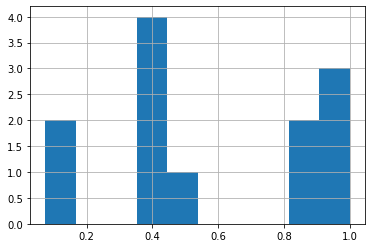

In [203]:
df_travel.Result.hist()

#### Мультииндекс

In [94]:
t = list(zip(*[['one','one','two','two'], ['street','city','street','city']]))
print(t)
index = pd.MultiIndex.from_tuples(t, names=['first','second'])
df1 = pd.DataFrame(np.ones((4,2)), index=index)
df1

[('one', 'street'), ('one', 'city'), ('two', 'street'), ('two', 'city')]


,,0,1
first,second,,
one,street,1.00,1.00
...,...,...,...
two,city,1.00,1.00


#### Сводная таблица (crosstab)

In [95]:
pd.crosstab(df_travel['City'], df_travel['Result'].apply(lambda x: round(x,2)), margins=True)

Result,0.08,...,All
City,,,
Krasnodar,1,...,3
...,...,...,...
All,1,...,12


#### Сводная таблица (pivottable)

In [96]:
df_travel

,Date,City,Result
0,2020-01-01,Krasnodar,0.40
...,...,...,...
11,2020-01-12,Krasnodar,0.92


In [97]:
df_travel.pivot_table(['Result'], index='Date', aggfunc='mean')

,Result
Date,
2020-01-01,0.40
...,...
2020-01-12,0.92


#### Нарисовать гистограмму

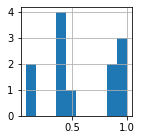

In [98]:
df_travel['Result'].hist(figsize=(2,2))

0     0
     ..
11    0
Name: City, Length: 12, dtype: int64


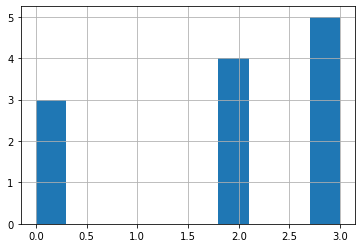

In [99]:
print(df_travel['City'].map({'Krasnodar':0, 'Moscow':1, 'Vladivostok':2, 'Salekhard':3, 'Yekaterinburg':4}))
df_travel['City'].map({'Krasnodar':0, 'Moscow':1, 'Vladivostok':2, 'Salekhard':3, 'Yekaterinburg':4}).hist()

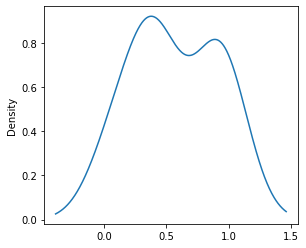

In [100]:
df_travel['Result'].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4));

<a href='#toc'>Назад к Оглавлению</a>

# Операции со структурами pandas <a name='structure_ops'></a>

#### Конкатенация двух датафеймов

In [101]:
dfA = pd.DataFrame([[1,'Moscow'],[2,'Yekaterinburg']], columns=['Number', 'City'])
dfB = pd.DataFrame([[3,'Vladivostok'],[4,'Novosibirsk']], columns=['Number', 'City'])

In [102]:
pd.concat([dfA, dfB],axis=0)

,Number,City
0,1,Moscow
...,...,...
1,4,Novosibirsk


In [103]:
pd.concat([dfA, dfB],axis=1)

,Number,...,City
0,1,...,Vladivostok
1,2,...,Novosibirsk


#### Слияние двух датафреймов

In [104]:
clients_data = {'id': [1,2,3], 'name': ['Ivanov', 'Petrov', 'Sidorov']}
dfClients = pd.DataFrame(clients_data, columns=['id','name'])
dfClients

,id,name
0,1,Ivanov
1,2,Petrov
2,3,Sidorov


In [105]:
work_data = {'id': [1,2], 'work': ['MTS', 'RTK']}
dfWork = pd.DataFrame(work_data, columns=['id','work'])
dfWork

,id,work
0,1,MTS
1,2,RTK


In [106]:
pd.merge(dfClients, dfWork, on='id')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK


In [107]:
pd.merge(dfClients, dfWork, on='id', how='outer')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK
2,3,Sidorov,NaN


In [108]:
pd.merge(dfClients, dfWork, on='id', how='left')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK
2,3,Sidorov,NaN


In [109]:
pd.merge(dfClients, dfWork, on='id', how='right')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK


<a href='#toc'>Назад к Оглавлению</a>

# Работа со временем <a name='time'></a>

In [110]:
datetime = pd.date_range('2000/01/01', periods=20, freq='w')

In [111]:
datetime

DatetimeIndex(['2000-01-02', '2000-01-09', '2000-01-16', '2000-01-23',
               '2000-01-30', '2000-02-06', '2000-02-13', '2000-02-20',
               '2000-02-27', '2000-03-05', '2000-03-12', '2000-03-19',
               '2000-03-26', '2000-04-02', '2000-04-09', '2000-04-16',
               '2000-04-23', '2000-04-30', '2000-05-07', '2000-05-14'],
              dtype='datetime64[ns]', freq='W-SUN')

In [112]:
df = pd.DataFrame(index=datetime)
df

""
2000-01-02
...
2000-05-14


In [113]:
df['Value'] = np.random.choice([1,2,3])

In [114]:
df.resample('M').sum()

,Value
2000-01-31,15
...,...
2000-05-31,6


<a href='#toc'>Назад к Оглавлению</a>

# Графика <a name='graphics'></a>

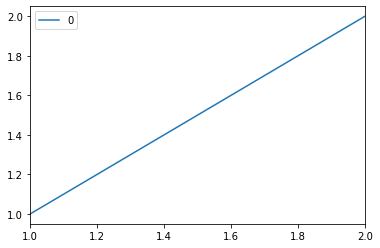

In [115]:
df = pd.DataFrame([1,2],[1,2])
df.plot()
plt.show()

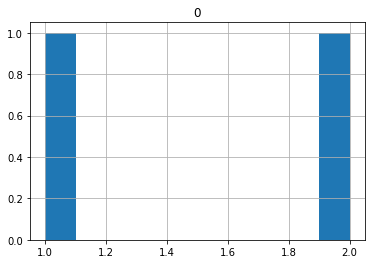

In [116]:
df.hist()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Ввод и вывод данных <a name='io'></a>

#### Преобразовать DataFrame в массив numpy

In [117]:
df.to_numpy()

array([[1],
       [2]], dtype=int64)

### CSV

In [204]:
df = pd.DataFrame([[1,'A'],[2,'B']])
display(df)

,0,1
0,1,A
1,2,B


In [119]:
print(os.path.exists('test.csv'))

True


In [205]:
df.to_csv('test.csv', index=False, header=False)
print(os.path.exists('test.csv'))

True


In [206]:
df1 = pd.read_csv('test.csv', header=None)
display(df1)

,0,1
0,1,A
1,2,B


### XLS

In [207]:
df.to_excel('test.xlsx', sheet_name='Sheet1')
pd.read_excel('test.xlsx', sheet_name='Sheet1')

,Unnamed: 0,0,1
0,0,1,A
1,1,2,B


<a href='#toc'>Назад к Оглавлению</a>

# Полезные ссылки <a name='links'></a>

https://pandas.pydata.org/
    
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

<a href='#toc'>Назад к Оглавлению</a>

# Задания для самостоятельной работы <a name='tasks'></a>

<a href='#toc'>Назад к Оглавлению</a>